<a href="https://colab.research.google.com/github/pzuniga/Huella_de_carbono_alimentos/blob/main/wk4_ejercicio_visualizaci%C3%B3n_de_datos(pr%C3%A1ctica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **¿Quieres disminuir la huella de carbono de tus alimentos?**
## **Concéntrese en lo que como, no si es local**

**Ejercicio de visualización de datos (práctica)**

Síntesis:
+ En la gráfica se aprecian las emisiones netas de gases de efecto invernadero (GEI) de 29 tipos de alimentos, en unidades de kgCO2e/kg producto.
+ Las emisiones de GEI de cada producto están distribuidas en las etapas del ciclo de vida:
  * Cambio de uso de suelo (*Land use change*)
  * Alimento de animales (*Animal feed*)
  * Campo (*Farm*)
  * Procesamiento (*Processing*)
  * Transporte (*Transport*)
  * Embalaje (*Packging*)
  * Comercialización minorista (*Retail*)
+ Existen grandes diferencia en la huella de carbono de los alimentos. Producir un kilogramo de carne de vacuno generar 60 veces más emisiones que producir la misma masa de mandioca.


Leer artículo completo en:

https://ourworldindata.org/food-choice-vs-eating-local

Datos obtenidos desde:

https://ourworldindata.org/uploads/2020/02/GHG-emissions-by-life-cycle-stage-OurWorldinData-upload.csv



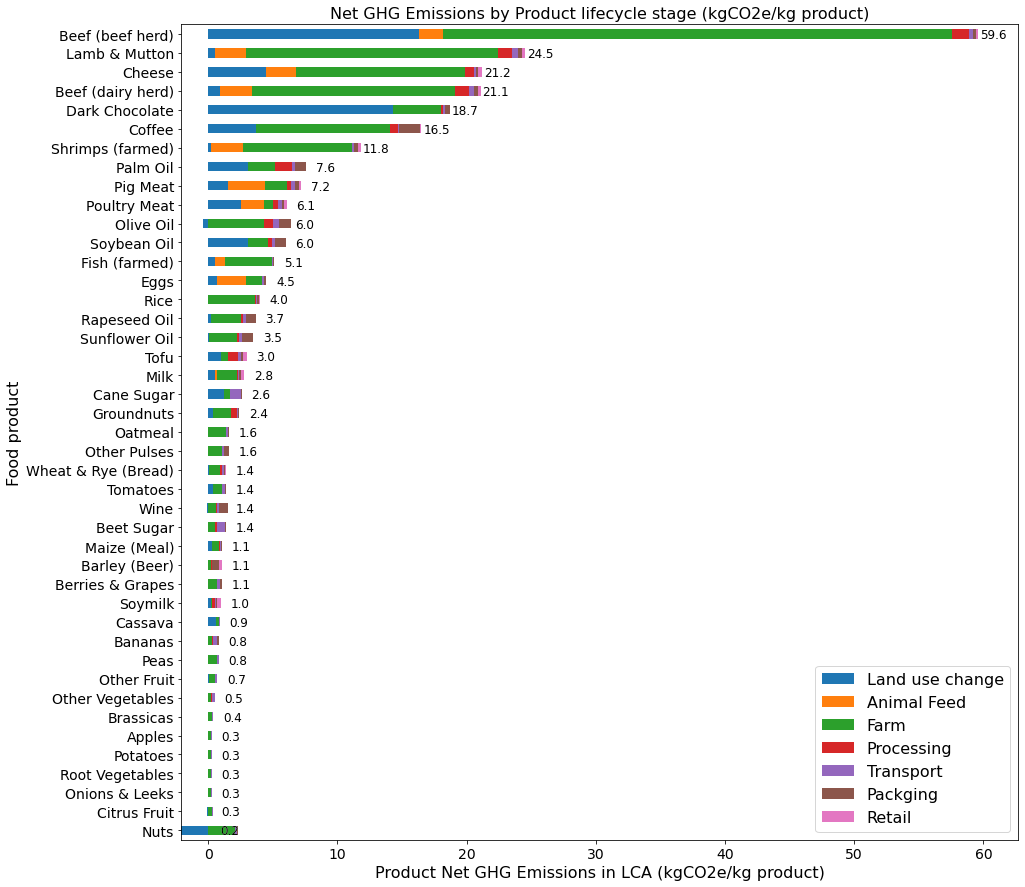

In [2]:
# Montar los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
# Cargar conjunto de datos
# Keep in mind that the filename will likely be different on your computer (especially later in course)
filename = '/content/drive/MyDrive/Colab Notebooks/wk4_Datos/GHG-emissions-by-life-cycle-stage-OurWorldinData-upload.csv'
df = pd.read_csv(filename)
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Unnamed: 8
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,NaN
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,NaN


In [12]:
# Borrar columna 'Unnamed: 8'
df.drop('Unnamed: 8',inplace=True,axis=1)
df


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0


In [29]:
# Crear nueva columna
# con suma de GHG en LCA
df['GHG_total_LCA']=df['Land use change']+df['Animal Feed']+df['Farm']+df['Processing']+df['Transport']+df['Packging']+df['Retail']
df

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,GHG_total_LCA
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6


In [ ]:
# Gráfico auxiliar para obtener las etiquetas de barras del gráfico más abajo
ax1=df.sort_values(by='GHG_total_LCA',ascending=True).plot.barh(x='Food product',
                                                            y='GHG_total_LCA',
                                                            color='w',
                                                            figsize=(15,15),
                                                            fontsize=1,
                                                            title='',
                                                            xlabel='',
                                                            ylabel='')

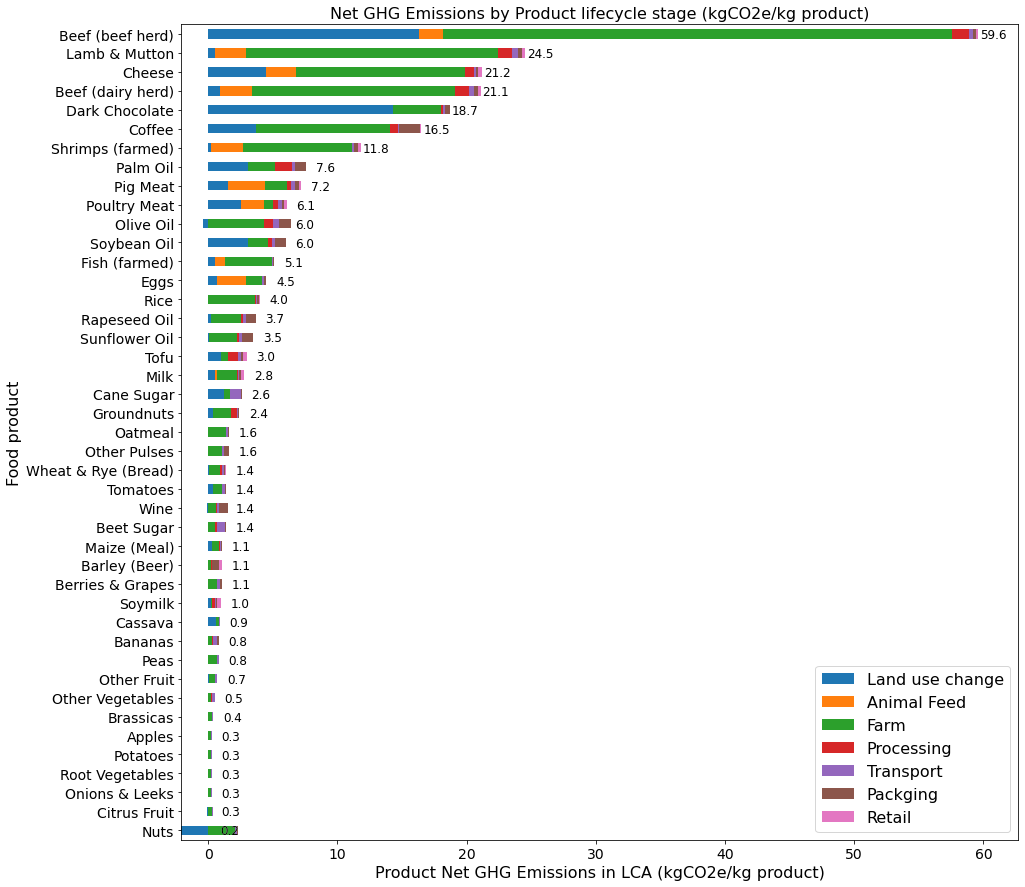

In [152]:
# Crear gráfico de barras horizontales, apilado por etapa LCA y con etiqueta de emigión GEI Neta
ax2=df.sort_values(by='GHG_total_LCA',ascending=True).plot.barh(x='Food product',
                                                            y=['Land use change','Animal Feed','Farm','Processing','Transport','Packging','Retail'],
                                                            stacked=True,
                                                            figsize=(15,15),
                                                            fontsize=14,                                                            
                                                            xlabel='Products',
                                                            ylabel='Product Net GHG Emissions in LCA (kgCO2e/kg product)'
                                                            )

plt.title('Net GHG Emissions by Product lifecycle stage (kgCO2e/kg product)',fontsize=16)
plt.xlabel('Product Net GHG Emissions in LCA (kgCO2e/kg product)',fontsize=16)
plt.ylabel('Food product',fontsize=16)
plt.legend(fontsize=16)
#lt.xticks(rotation=90)
# Código extraido desde
# <https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/>
# Modificado para utilizarlo sobre barras horizontales
for bar in ax1.patches:
  # The text annotation for each bar should be its height.
  #bar_value = bar.get_height()
  bar_value = bar.get_width()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:.1f}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() + 2.2 #/ 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar.get_height() +0.05 #+ bar_value 
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax2.text(text_x, text_y, text, ha='right', va='top', color=bar_color,
          size=12)
  ax2.text(text_x, text_y, text, ha='right', va='top', color='black',
          size=12)

plt.show()